# Building a library

### Loading our data

In this lesson, we'll build up our library by using ecommerce sales data.  Let's get started by loading our data.  

In [2]:
import pandas as pd
url = "./sales_data.csv"
df = pd.read_csv(url, index_col = 0)
df[:2]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,New York City,7


* total rev per product

In [7]:
# Total revenue per product

top_products = df.groupby('Product')['Price Each'].sum().sort_values(ascending = False)
top_products[:3]
# top_products[:3]

Product
Macbook Pro Laptop    8030800.00
iPhone                4789400.00
ThinkPad Laptop       4127958.72
Name: Price Each, dtype: float64

In [12]:
pct_revenue = top_products/top_products.sum()

pct_revenue[:3]

Product
Macbook Pro Laptop    0.234208
iPhone                0.139677
ThinkPad Laptop       0.120387
Name: Price Each, dtype: float64

In [15]:
pct_revenue.cumsum()[pct_revenue.cumsum() < .80 ]

Product
Macbook Pro Laptop          0.234208
iPhone                      0.373885
ThinkPad Laptop             0.494272
Google Phone                0.590950
27in 4K Gaming Monitor      0.661807
34in Ultrawide Monitor      0.730305
Apple Airpods Headphones    0.798325
Name: Price Each, dtype: float64

* Pct revenue per product

In [34]:
pct = None
pct[:3]

Product
Macbook Pro Laptop    0.234208
iPhone                0.139677
ThinkPad Laptop       0.120387
Name: sum, dtype: float64

And running percent with the following:

In [36]:
cum_pct = None
cum_pct[:3]

Product
Macbook Pro Laptop    0.234208
iPhone                0.373885
ThinkPad Laptop       0.494272
Name: sum, dtype: float64

This seems useful -- let's turn it into a function.

In [16]:
def build_grouped_by(df, col, target, agg = 'sum', agg_name = None, pct = True):
    grouped_data = df.groupby(col)[target].agg([agg]).sort_values(agg, ascending = False)
    if pct:
        grouped_data = (grouped_data/df[target].sum())
        cum_pct = grouped_data.cumsum()/grouped_data.sum()
        grouped_data = grouped_data.assign(cum_pct = cum_pct)
    if agg_name:
        grouped_data = grouped_data.rename(columns={agg: agg_name})
    return grouped_data.round(3)

Ok, now let's see our function in action.

For example, we can quickly see how our revenue breaks down by city with something like the following.

In [18]:
target = 'Price Each'
grouped_data = build_grouped_by(df, 'City', target,
                                agg = 'sum', agg_name = 'percent_revenue')
grouped_data

,percent_revenue,cum_pct
City,,
San Francisco,0.239,0.239
Los Angeles,0.158,0.398
New York City,0.135,0.533
Boston,0.106,0.639
Atlanta,0.081,0.720
Dallas,0.080,0.800
Seattle,0.080,0.880
Portland,0.067,0.947
Austin,0.053,1.000


And we can use a loop to allow us to pass through multiple columns, producing a dataframe for each one.

In [19]:
def build_grouped_bys(df, cols, target, agg = 'sum', agg_name = None, pct = True):
    totals_by_col = [build_grouped_by(df, col, target, agg = 'sum', agg_name = agg_name) for col in cols]
    totals = dict(zip(cols, totals_by_col))
    return totals

And now we can quickly see how our revenue breaks down across multiple criteria.

In [11]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [21]:
cols = ['Product', 'Month', 'Hour']

In [22]:
target = 'Price Each'
results = build_grouped_bys(df, cols, target, agg = 'sum', agg_name = 'percent_revenue')

In [26]:
# results['Month']

> This function returns a dictionary where each key has a corresponding dataframe.

In [15]:
results.keys()

dict_keys(['Product', 'Month', 'Hour'])

In [27]:
results['Product'][:5]

,percent_revenue,cum_pct
Product,,
Macbook Pro Laptop,0.234,0.234
iPhone,0.140,0.374
ThinkPad Laptop,0.120,0.494
Google Phone,0.097,0.591
27in 4K Gaming Monitor,0.071,0.662


So above we can see that three months account for 34% of our sales.

### Viewing our data

Ok, so above, we have developed a function to quickly aggregate a target by different criteria.  From there, we can build a function for plotting this data.

In [28]:
import matplotlib.pyplot as plt
def print_grouped_by(grouped, title = "", axis = '', limit = 10, y_range = [0, 1], y_col = 0):
    selected_group = grouped[grouped.iloc[:, 0].values != None]
    fig = plt.figure(figsize=(14, 2))
    plt.scatter(selected_group.index[:limit], selected_group.iloc[:limit, y_col])
    plt.ylim(y_range)
    plt.title(title)
    plt.show()

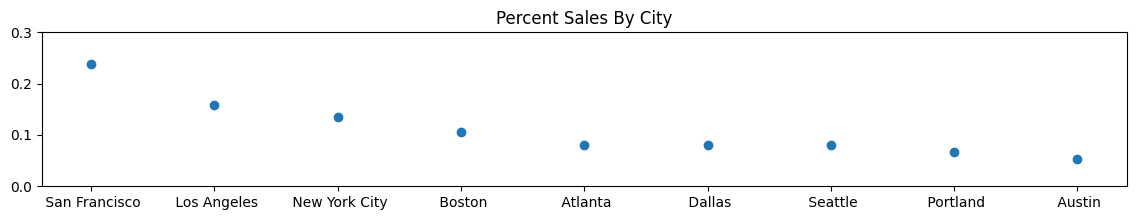

In [29]:

print_grouped_by(grouped_data, title = "Percent Sales By City", y_range = [0, .3], y_col = 0)

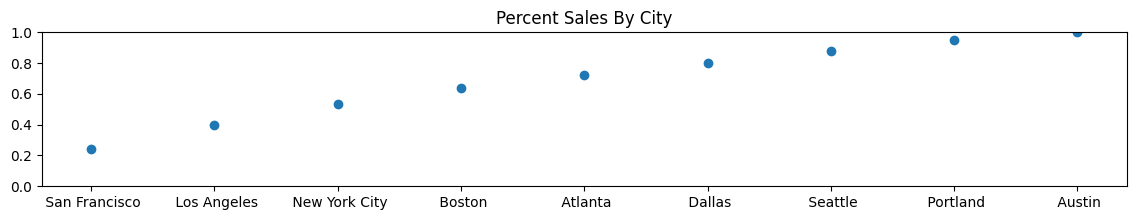

In [82]:
print_grouped_by(grouped_data, title = "Percent Sales By City", y_range = [0, 1], y_col = 1)

### All together now

Ok, so then a quick way to determine what to focus on is to select some promising columns, and graph them to see what appears to be drivers of our target.

In [16]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [30]:
grouped_by_cols = ['Product', 'City', 'Month', 'Hour', 'Purchase Address']

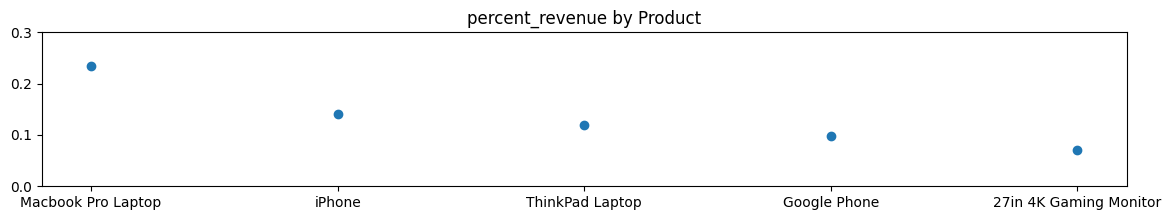

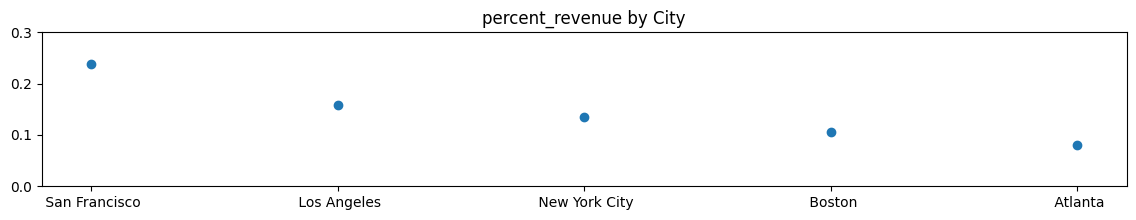

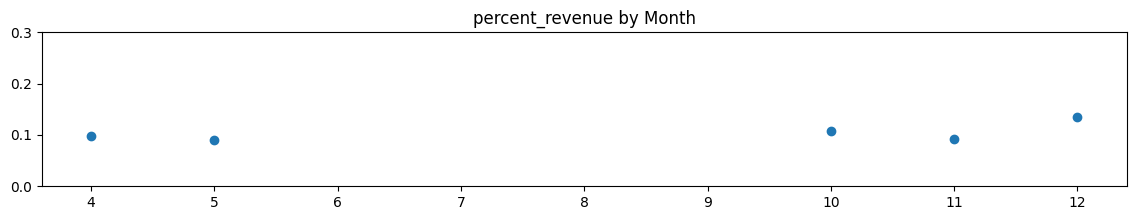

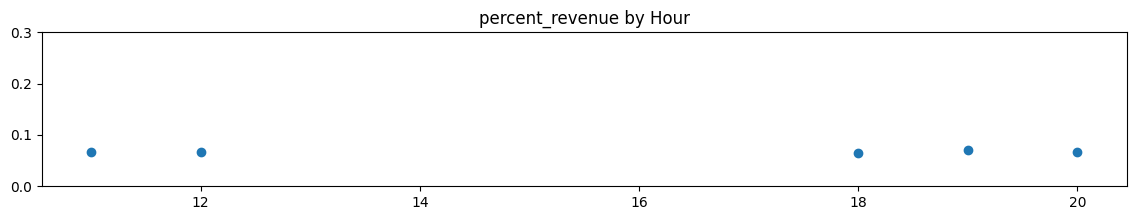

In [31]:
def build_and_print(df, cols, target, agg = 'sum', agg_name = "", limit = 10, y_range = [0, 1], y_col = 0):
    totals_by_col = [build_grouped_by(df, col, target, agg = 'sum', agg_name = agg_name)
                 for col in cols]
    totals = dict(zip(cols, totals_by_col))    
    [print_grouped_by(df, title = f"{agg_name} by {col}", y_range = y_range, limit = limit, y_col = y_col) for col, df in totals.items()]
    return totals

# call function
target = 'Price Each'
agg_name = 'percent_revenue'

cols = ['Product', 'City', 'Month', 'Hour']

results = build_and_print(df, cols, target, agg = 'sum', agg_name = agg_name, y_range = [0, .3], limit = 5)

Another nice thing, is that the `build_and_print` function returns that dictionary of dataframes.  So after plotting our columns above, we can then select the dataframe that we find interesting, and explore it further.

In [23]:
results.keys()

dict_keys(['Product', 'City', 'Month', 'Hour'])

In [25]:
results['City'][:5]

,percent_revenue,cum_pct
City,,
San Francisco,0.239,0.239
Los Angeles,0.158,0.398
New York City,0.135,0.533
Boston,0.106,0.639
Atlanta,0.081,0.720


### Summary

In this lesson, we saw some quick ways to view our data.  

> You can move these functions into an `item_lib.py` file.  We'll use them going forward.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

def build_grouped_by(df, col, target, agg = 'sum', agg_name = None, pct = True):
    grouped_data = df.groupby(col)[target].agg([agg]).sort_values(agg, ascending = False)
    if pct:
        grouped_data = (grouped_data/df[target].sum())
        cum_pct = grouped_data.cumsum()/grouped_data.sum()
        grouped_data = grouped_data.assign(cum_pct = cum_pct)
    if agg_name:
        grouped_data = grouped_data.rename(columns={agg: agg_name})
    return grouped_data.round(3)

def build_grouped_bys(df, cols, target, agg = 'sum', agg_name = None, pct = True):
    totals_by_col = [build_grouped_by(df, col, target, agg = 'sum', agg_name = agg_name) for col in cols]
    totals = dict(zip(cols, totals_by_col))
    return totals

def print_grouped_by(grouped, title = "", axis = '', limit = 10, y_range = [0, 1], y_col = 0):
    selected_group = grouped[grouped.iloc[:, 0].values != None]
    fig = plt.figure(figsize=(14, 2))
    plt.scatter(selected_group.index[:limit], selected_group.iloc[:limit, y_col])
    plt.ylim(y_range)
    plt.title(title)
    plt.show()
    
def build_and_print(df, cols, target, agg = 'sum', agg_name = "", limit = 10, y_range = [0, 1], y_col = 0):
    totals_by_col = [build_grouped_by(df, col, target, agg = 'sum', agg_name = agg_name)
                 for col in cols]
    totals = dict(zip(cols, totals_by_col))    
    [print_grouped_by(df, title = f"{agg_name} by {col}", y_range = y_range, limit = limit, y_col = y_col) for col, df in totals.items()]
    return totals

def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):
    if isinstance(fldnames,str):
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)

### Bonus: An alternative group by 

We can use the following function if our data is in SQL.

In [ ]:
def build_grouped_by(table_name, col, target, engine, order_by_col = False):
    if order_by_col:
        query = f"""select {col}, sum({target}) total_amount from {table_name} group by {col} order by {col} asc"""
    else:
        query = f"""select {col}, sum({target}) total_amount from {table_name} group by {col} order by total_amount desc"""
    grouped = pd.read_sql(query, engine)
    return grouped

### Resources

[Sales Product Data](https://www.kaggle.com/datasets/knightbearr/sales-product-data)

[Unit Economics](https://www.paddle.com/resources/unit-economics)

[Olist Dataset Multitables](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
